# Forecasting 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Import Dataset
df = pd.read_excel('Airlines+Data.xlsx')
print('Shape of the data',df.shape)
df.head(10)

Shape of the data (96, 2)


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [4]:
df.isnull().any()

Month         False
Passengers    False
dtype: bool

In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
df[df.duplicated()]

,Month,Passengers


In [8]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
# Renaming the Month column into Date
df.rename({'Month':'Date'},axis=1, inplace=True)

In [10]:
# Making the Date as DateTime index for the Dataframe
df1 = df.copy()
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [11]:
df1.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [12]:
# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


In [50]:
from numpy import sqrt
from numpy import log

In [48]:
df['Log Passengers'] = log(df['Passengers'])

In [49]:
df

,Date,Passengers,month,year,Log Passengers
0,1995-01-01,112,Jan,1995,4.718499
1,1995-02-01,118,Feb,1995,4.770685
2,1995-03-01,132,Mar,1995,4.882802
3,1995-04-01,129,Apr,1995,4.859812
4,1995-05-01,121,May,1995,4.795791
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,6.003887
92,2002-09-01,355,Sep,2002,5.872118
93,2002-10-01,306,Oct,2002,5.723585
94,2002-11-01,271,Nov,2002,5.602119


In [62]:
#adding t coloumn
df['t'] = np.arange(1,len(df)+1)

In [63]:
df

,Date,Passengers,month,year,Log Passengers,t
0,1995-01-01,112,Jan,1995,4.718499,1
1,1995-02-01,118,Feb,1995,4.770685,2
2,1995-03-01,132,Mar,1995,4.882802,3
3,1995-04-01,129,Apr,1995,4.859812,4
4,1995-05-01,121,May,1995,4.795791,5
...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,6.003887,92
92,2002-09-01,355,Sep,2002,5.872118,93
93,2002-10-01,306,Oct,2002,5.723585,94
94,2002-11-01,271,Nov,2002,5.602119,95


In [71]:
#converting months into dummies
months = pd.get_dummies(df['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [74]:
months

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [76]:
# Joining months and original data
airlines = pd.concat([df,months],axis=1)

In [86]:
airlines.shape

(96, 18)

In [87]:
#splitting data
Train = airlines.head(88)
Test = airlines.tail(12)

# Visualization

<AxesSubplot:>

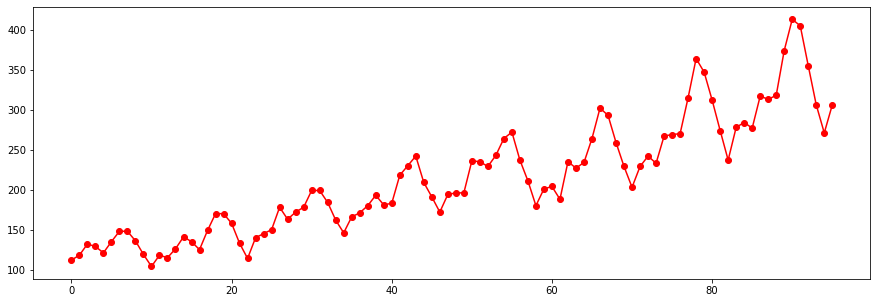

In [19]:
airlines.Passengers.plot(figsize=(15,5), color = 'red', marker= 'o')

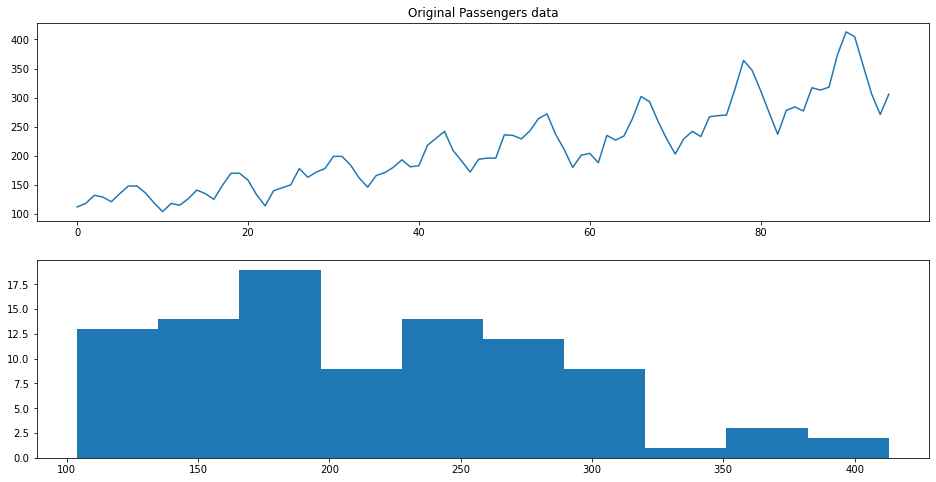

In [59]:
from matplotlib import pyplot
plt_1 = plt.figure(figsize=(16, 8))
# line plot
pyplot.subplot(211)
pyplot.plot(df['Passengers'])
plt.title('Original Passengers data')
# histogram
pyplot.subplot(212)
pyplot.hist(df['Passengers'])
pyplot.show()

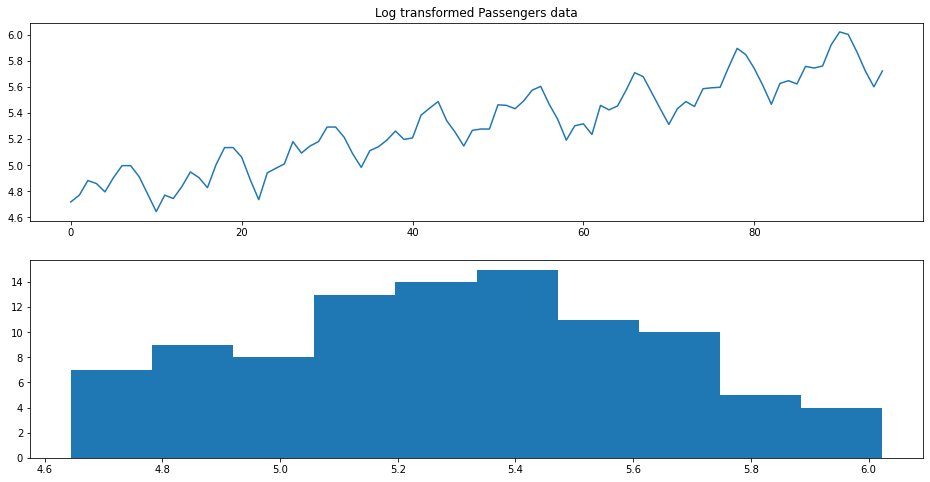

In [60]:
plt_1 = plt.figure(figsize=(16, 8))
# line plot
pyplot.subplot(211)
pyplot.plot(df['Log Passengers'])
plt.title('Log transformed Passengers data')
# histogram
pyplot.subplot(212)
pyplot.hist(df['Log Passengers'])
pyplot.show()

Text(0.5, 1.0, 'Heatmap')

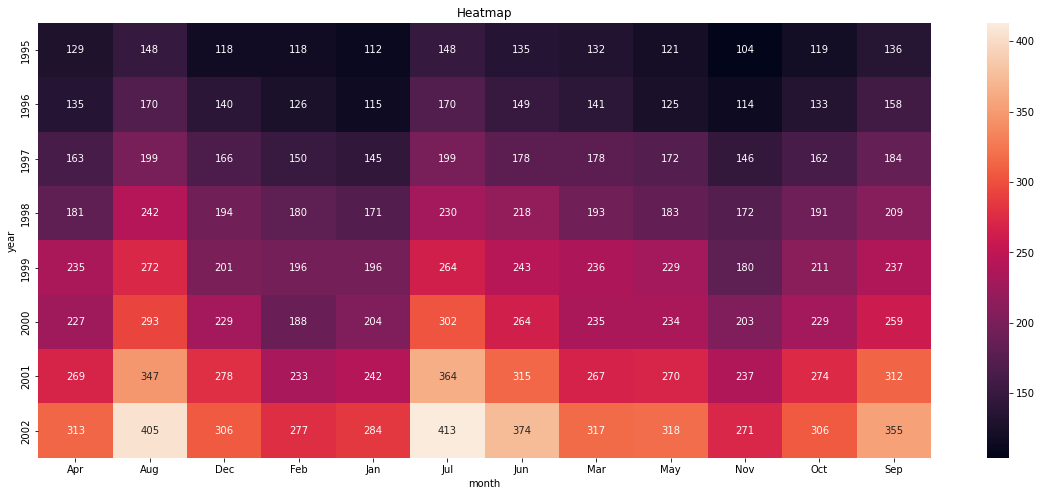

In [26]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title('Heatmap')

Text(0.5, 1.0, 'Moving Average')

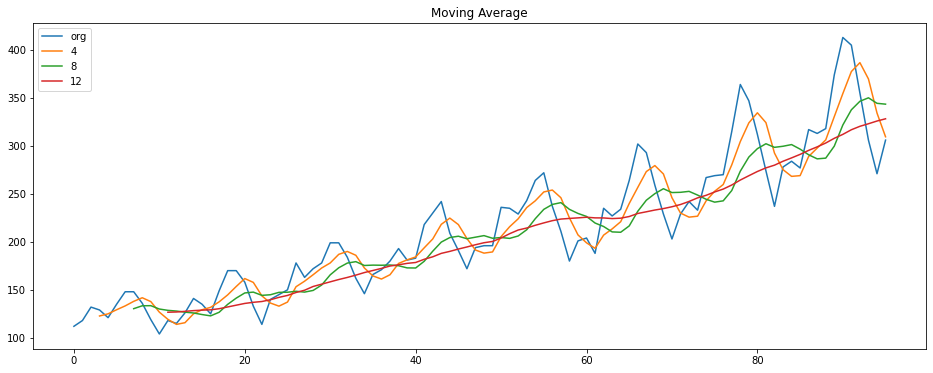

In [25]:
plt.figure(figsize=(16,6))
df.Passengers.plot(label="org")
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.title('Moving Average')

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

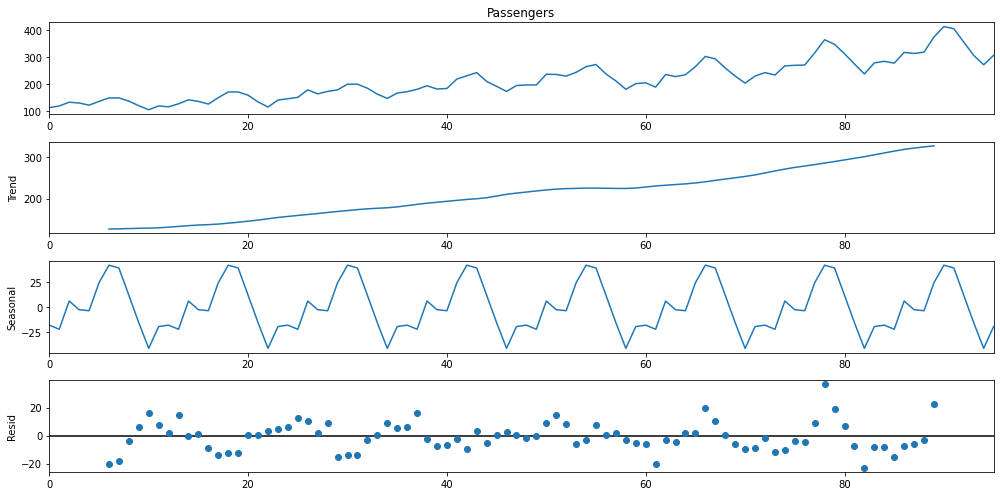

In [20]:
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,7))
    decompose_ts_add.plot()
    plt.show()

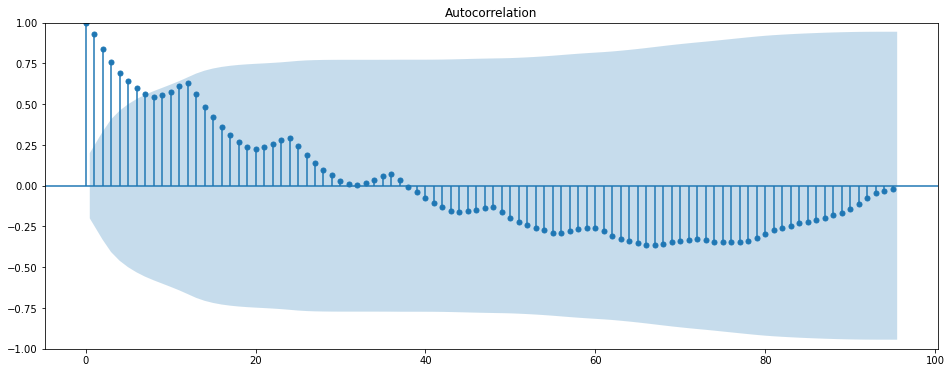

In [28]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(16,6))
    tsa_plots.plot_acf(df.Passengers ,lags=95)
    plt.show()

E:\Python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


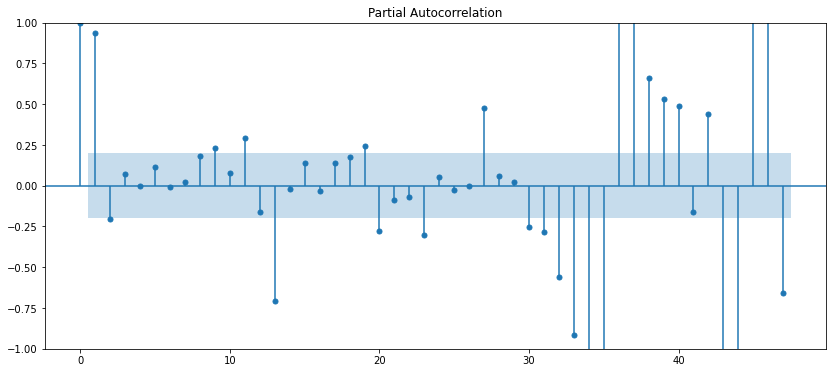

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

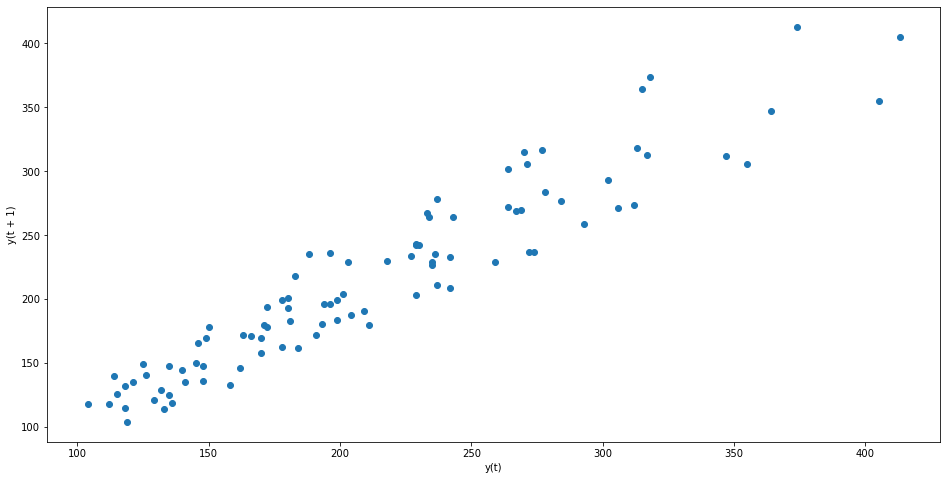

In [61]:
from pandas.plotting import lag_plot
plt_1 = plt.figure(figsize=(16, 8))
lag_plot(df.Passengers)

# Evaluation Metric - MAPE

In [85]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [80]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Model

In [88]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

11.754659575652832

# Holt method

In [94]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_19300\2575406107.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.158963596138156

# Holts winter exponential smoothing with additive seasonality and additive trend


In [91]:
hwe_model_mul_add = ExponentialSmoothing(Train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.0016035970912376

# Final Model by combining train and test

In [96]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [97]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
dtype: float64